# # EDA: Exploratory Data Analysis
# This notebook explores the `train.csv` dataset of patient–counselor exchanges to understand its structure and key features.

## 1. Imports & Load Data

In [2]:
import pandas as pd
df = pd.read_csv("../data/raw/train.csv")
print("Shape:", df.shape)
# Display first 3 rows
df.head(3)

Shape: (3512, 2)


,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...


## 2. Preview & Basic Stats

In [3]:
# Column names and missing values
print("Columns:", df.columns.tolist())
print("Missing per column:\n", df.isna().sum())

Columns: ['Context', 'Response']
Missing per column:
 Context     0
Response    4
dtype: int64


## 3. Length Distributions

In [4]:
# Compute token counts
df["ctx_len"] = df.Context.str.split().str.len()
df["resp_len"] = df.Response.str.split().str.len()

In [5]:
# Descriptive stats
df[["ctx_len","resp_len"]].describe()

,ctx_len,resp_len
count,3512.000000,3508.000000
mean,55.180809,177.203820
std,48.275077,120.665564
min,5.000000,1.000000
25%,28.000000,94.000000
50%,46.000000,145.000000
75%,68.000000,221.000000
max,526.000000,939.000000


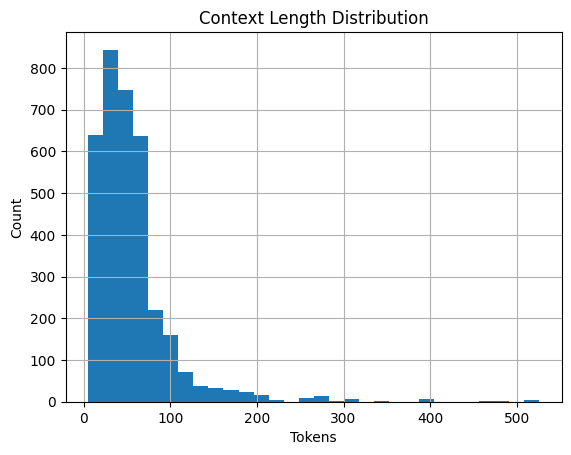

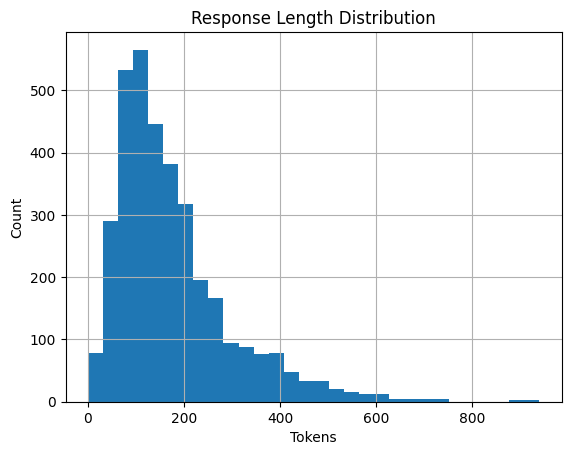

In [6]:
import matplotlib.pyplot as plt

plt.figure()
df.ctx_len.hist(bins=30)
plt.title("Context Length Distribution")
plt.xlabel("Tokens")
plt.ylabel("Count")

plt.figure()
df.resp_len.hist(bins=30)
plt.title("Response Length Distribution")
plt.xlabel("Tokens")
plt.ylabel("Count")

plt.show()


## 4. Top Keywords


In [8]:
from collections import Counter
import itertools

# Context words (drop any nulls just in case)
ctx_tokens = df.Context.dropna().str.lower().str.split()
ctx_words = Counter(itertools.chain.from_iterable(ctx_tokens))
print("Top 20 in Context:", ctx_words.most_common(20))

# Response words (replace nulls with empty strings)
resp_tokens = df.Response.fillna("").str.lower().str.split()
resp_words = Counter(itertools.chain.from_iterable(resp_tokens))
print("Top 20 in Response:", resp_words.most_common(20))


Top 20 in Context: [('i', 13065), ('and', 6714), ('to', 6356), ('my', 4677), ('a', 4529), ('the', 3057), ('have', 2724), ('he', 2648), ('of', 2249), ('in', 2145), ('me', 2140), ('with', 2077), ('but', 2069), ('is', 2049), ('that', 1826), ('for', 1697), ("i'm", 1603), ('it', 1587), ('she', 1430), ('do', 1270)]
Top 20 in Response: [('to', 25264), ('you', 24547), ('the', 16729), ('and', 16073), ('a', 14253), ('your', 12388), ('is', 11507), ('that', 11227), ('of', 11134), ('in', 8439), ('are', 7604), ('with', 6672), ('be', 6502), ('for', 5934), ('it', 5914), ('can', 5234), ('or', 4770), ('this', 4685), ('i', 4609), ('if', 4529)]


## 5. Sample Dialogues

In [9]:
for idx in [0, 10, 50]:
    print(f"--- Example {idx} ---")
    print("Patient:", df.Context[idx])
    print("Counselor:", df.Response[idx], "\n")

--- Example 0 ---
Patient: I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
Counselor: If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media.  Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is s

## 6. Thematic Counts


In [10]:
# Count how many contexts mention key terms
for term in ["anxiety", "depress", "stress", "trauma"]:
    cnt = df.Context.str.contains(term, case=False).sum()
    print(f"{term}: {cnt} occurrences")


anxiety: 353 occurrences
depress: 431 occurrences
stress: 172 occurrences
trauma: 34 occurrences


## 7. Save a Processed Sample (Optional)


In [11]:
# Save a random subset for frontend testing
df.sample(100)[["Context","Response"]]  \
  .to_csv("../data/processed/sample_100.csv", index=False)
